In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Reading the file
file = 'auto-mpg.csv'
auto_mpg = pd.read_csv(file, sep=',')

In [2]:
# Preview the 5 first rows of the dataset
auto_mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Remove the car name column
auto_mpg = auto_mpg.drop('car name', axis=1)

# Preview the new dataset without the car name column
auto_mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
# Let's check the type of the horsepower column
auto_mpg['horsepower'].dtypes

dtype('O')

In [5]:
# Replacing strings with column mean
# Converting horsepower column to numeric
auto_mpg['horsepower'] = pd.to_numeric(auto_mpg['horsepower'], errors='coerce')

In [6]:
# The rows with string values were converted to NaN
# We will replace them with the mean
# Let's calculate the mean
mean_horsepower = auto_mpg['horsepower'].mean()
# Let's replace the values NaN with the mean
auto_mpg['horsepower'].fillna(mean_horsepower, inplace=True)

In [7]:
# Let's check the data type of the column now
auto_mpg['horsepower'].dtypes

dtype('float64')

In [8]:
# Creating dummy variables for the origin column
origin_dummy = pd.get_dummies(auto_mpg['origin'], prefix='origin')

# Add th dummy variable to the dataset
auto_mpg = pd.concat([auto_mpg, origin_dummy], axis=1)

# Preview the dataset
auto_mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,1,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,1,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,1,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,1,True,False,False


In [9]:
# Let's now remove the origin origin column
auto_mpg = auto_mpg.drop(['origin'], axis = 1)

# Let's preview the final dataset
auto_mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,True,False,False


In [10]:
# Correation coefficient matrix
correlation = auto_mpg.corr()

# Show the result
correlation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin_1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin_3,0.442174,-0.396479,-0.433505,-0.321325,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


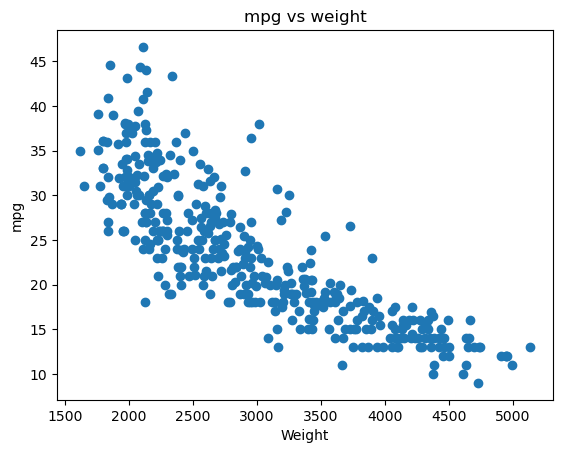

In [11]:
# Mpg vs weight
plt.scatter(auto_mpg['weight'], auto_mpg['mpg'])
plt.xlabel('Weight') # adding a label to the x
plt.ylabel('mpg') # Adding a y label
plt.title('mpg vs weight') # Adding a title to the graph
plt.show() # Show the graph

In [12]:
# Splitting the data
features = auto_mpg.drop('mpg', axis=1) # Excluding the target variable from the training data
target = auto_mpg['mpg'] # target variable
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [13]:
# Training ordinary linear regression on the training data
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

In [14]:
# Let's calculate the R-squared score like the example in the book at page 192
model.score(features_test, target_test)

0.8267779755698316

In [15]:
# Prediction on training and tests data
target_train_prediction = model.predict(features_train)
target_test_prediction = model.predict(features_test)

In [16]:
# R2 on training and test data
r2_training = r2_score(target_train, target_train_prediction)
r2_test = r2_score(target_test, target_test_prediction)

print('R2 training :', r2_training)
print('R2 test :', r2_test)

R2 training : 0.8213002640137388
R2 test : 0.8267779755698316


In [17]:
# RMSE
rmse_training = np.sqrt(mean_squared_error(target_train, target_train_prediction))
rmse_test = np.sqrt(mean_squared_error(target_test, target_test_prediction))
                    
# Print the results
print('RMSE training :', rmse_training)
print('RMSE test :', rmse_test)

RMSE training : 3.2821781970246966
RMSE test : 3.3154509440684476


In [18]:
# MAE
mae_training = mean_absolute_error(target_train, target_train_prediction)
mae_test = mean_absolute_error(target_test, target_test_prediction)

# Print the results
print('MAE training ', mae_training)
print('MAE testing ', mae_test)

MAE training  2.4796581184346
MAE testing  2.7002657265169927


In [19]:
# Load libraries
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression


# Standardize features
scaler = StandardScaler()
features_train_standardized = scaler.fit_transform(features_train)
features_test_standardized = scaler.transform(features_test)

# Create lasso regression with alpha value
lasso_regression = Lasso(alpha=0.5)

# Fit the linear regresson
lasso_model = lasso_regression.fit(features_train_standardized, target_train)

In [20]:
# Predict on the training set
lasso_target_train_prediction = lasso_model.predict(features_train_standardized)

# Predict on the test set
lasso_target_test_prediction = lasso_model.predict(features_test_standardized)

In [21]:
# R2 on training and test data
lasso_r2_training = r2_score(target_train, lasso_target_train_prediction)
lasso_r2_test = r2_score(target_test, lasso_target_test_prediction)

print('R2 training :', lasso_r2_training)
print('R2 test :', lasso_r2_test)

R2 training : 0.8067370207065998
R2 test : 0.8274523872542543


In [22]:
# RMSE
lasso_rmse_training = np.sqrt(mean_squared_error(target_train, lasso_target_train_prediction))
lasso_rmse_test = np.sqrt(mean_squared_error(target_test, lasso_target_test_prediction))
                    
# Print the results
print('RMSE training :', lasso_rmse_training)
print('RMSE test :', lasso_rmse_test)

RMSE training : 3.4133005905733316
RMSE test : 3.3089905662243235


In [23]:
# MAE
lasso_mae_training = mean_absolute_error(target_train, lasso_target_train_prediction)
lasso_mae_test = mean_absolute_error(target_test, lasso_target_test_prediction)

# Print the results
print('MAE training ', lasso_mae_training)
print('MAE testing ', lasso_mae_test)

MAE training  2.52471572507007
MAE testing  2.5503823885951684
